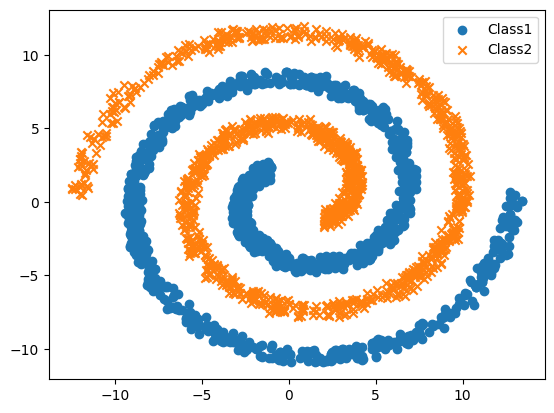

Train : 2447
Test : 977
 Enter value of k: 7
Confusion Matrix : 
         class_3  class_4 
class_3      488         0
class_4        0       489
Accuracy : 100.0
Precision : 
Precision for class 0: 1.0
Precision for class 1: 1.0
Average Precision : 1.0
Recall :
Recall for class 0: 1.0
Recall for class 1: 1.0
Average Recall : 1.0
F1 Score : 
F1 Score for class 0: 1.0
F1 Score for class 1: 1.0
Average F1 Score : 1.0


In [1]:

# Package imported for different libraries
import math
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import operator
import csv
import random
from pandas import *


loaddata_train1 = np . loadtxt ('class1_train.txt')
loaddata_train2 = np . loadtxt ('class2_train.txt')
loaddata_test1 = np . loadtxt ('class1_test.txt')
loaddata_test2 = np . loadtxt ('class2_test.txt')
loaddata_train = np . concatenate (( loaddata_train1 , loaddata_train2 ) , axis =0)
loaddata_test = np . concatenate (( loaddata_test1 , loaddata_test2 ) , axis =0)




label1 = np . ones (( loaddata_train1 . shape [0] , 1) )
label2 = np . ones (( loaddata_train2 . shape [0] , 1) ) * -1
r1 = np . append ( label1 , loaddata_train1 , axis =1)
r2 = np . append ( label2 , loaddata_train2 , axis =1)
train_data = np . concatenate (( r1 , r2 ) )


# Labeling testing data
label3 = np . ones (( loaddata_test1 . shape [0] , 1) )
label4 = np . ones (( loaddata_test2 . shape [0] , 1) ) * -1
r3 = np . append ( label3 , loaddata_test1 , axis =1)
r4 = np . append ( label4 , loaddata_test2 , axis =1)
test_data = np . concatenate (( r3 , r4 ))



# Ploting Data
plt . scatter ( loaddata_train1 [: ,0] , loaddata_train1 [: ,1] , marker ='o', label ='Class1')
plt . scatter ( loaddata_train2 [: ,0] , loaddata_train2 [: ,1] , marker ='x', label ='Class2')
plt . legend ()
plt . show ()

# Function to find Euclidean distances
def euclideanDistance ( instance1 , instance2 , length ):
    distance = 0
    for x in range ( length ):
        distance += pow (( float ( instance1 [x ]) - float ( instance2 [ x ]) ) , 2)
    return math . sqrt ( distance )



# Function to find neighbours by sorting Euclidean distances
def getKNeighbors ( train_data , testInstance , k):
    distances = []
    length = len ( testInstance ) -1
    for x in range ( len ( train_data )):
        dist = euclideanDistance ( testInstance , train_data [x], length )
        distances . append (( train_data [ x], dist ))
    distances . sort ( key = operator . itemgetter (1) )
    neighbors = []
    for x in range ( k):
        neighbors . append ( distances [x ][0])
    return neighbors



def getResponse ( neighbors ):
    classVotes = {}
    for x in range ( len ( neighbors ) ):
        response = neighbors [x ][0]
        if response in classVotes :
            classVotes [ response ] += 1
        else :
            classVotes [ response ] = 1
    sortedVotes = sorted ( classVotes . items () , key = operator . itemgetter (1) , reverse = True )
    return sortedVotes [0][0]


# Main function
def main () : 
    l00 = 0
    l01 = 0
    l10 = 0
    l11 = 0
    split = 0.70
    print ("Train : " + repr (len ( train_data )))
    print ("Test : " + repr ( len( test_data ) ))
# generate predictions
    predictions = []
    k = input (" Enter value of k: ")
    k = int (k)
    list_pred = []
    list_act = []
    for x in range ( len ( test_data ) ):
        neighbors = getKNeighbors ( train_data , test_data [ x], k)
        result = getResponse ( neighbors )
        predictions . append ( result )
        list_pred . append ( result )
        list_act . append ( test_data [x ][0])
    for i in range (0 , len ( test_data ) ):
        x = list_pred [0]
        y = list_act [0]
        if int ( list_pred [i ]) == -1 and int ( list_act [i ]) == -1:
            l00 += 1
        elif int ( list_pred [i ]) == -1 and int( list_act [i ]) == 1:
            l01 += 1
        elif int ( list_pred [i ]) == 1 and int ( list_act [i ]) == -1:
            l10 += 1
        elif int ( list_pred [i ]) == 1 and int ( list_act [i ]) == 1:
            l11 += 1
        i +=1
    a = np . array ([[ l00 , l01 ], 
                      [ l10 , l11 ]])
    print ("Confusion Matrix : ")
    print ( DataFrame (a , columns = ['class_3', 'class_4 '], index = ['class_3', 'class_4']) )
    prec_0 = ( l00 / float ( l00 + l10 ) )
    prec_1 = ( l11 / float ( l01 + l11 ) )
    acc = ( l00 + l11 ) *100/( l00 + l01 + l10 + l11 )
    print ("Accuracy : " + repr ( acc ))
    print ("Precision : ")
    print ("Precision for class 0: " + repr ( prec_0 ))
    print ("Precision for class 1: " + repr ( prec_1 ))
    print ("Average Precision : " + repr (( prec_0 + prec_1 ) /2) )

    rec_0 = ( l00 / float ( l00 + l01 ))
    rec_1 = ( l11 / float ( l10 + l11 ))
    print ("Recall :")
    print ("Recall for class 0: " + repr ( rec_0 ))
    print ("Recall for class 1: " + repr ( rec_1 ))
    print ("Average Recall : " + repr (( rec_0 + rec_1 ) /2) )
    f0 = (2*( prec_0 * rec_0 ) /( prec_0 + rec_0 ))
    f1 = (2*( prec_1 * rec_1 ) /( prec_1 + rec_1 ))
    print ("F1 Score : ")
    print ("F1 Score for class 0: " + repr ( f0 ))
    print ("F1 Score for class 1: " + repr ( f1 ))
    print ("Average F1 Score : " + repr (( f0 + f1 ) /2) )
main ()


